In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('breast_cancer.csv',na_values=['?',np.nan])

In [4]:
df

,code_no,thickness,uniform_cellsize,unif_shape,adhesion,epithetial_size,nuclei_size,chromatin,nucliei,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [5]:
#Since it is ID Number and unique for each column it is better to drop them
df['code_no'].unique

<bound method Series.unique of 0      1000025
1      1002945
2      1015425
3      1016277
4      1017023
        ...   
694     776715
695     841769
696     888820
697     897471
698     897471
Name: code_no, Length: 699, dtype: int64>

In [6]:
df.drop(columns='code_no',inplace=True)

In [7]:
df

,thickness,uniform_cellsize,unif_shape,adhesion,epithetial_size,nuclei_size,chromatin,nucliei,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [8]:
df.isnull().sum()

thickness            0
uniform_cellsize     0
unif_shape           0
adhesion             0
epithetial_size      0
nuclei_size         16
chromatin            0
nucliei              0
mitosis              0
class                0
dtype: int64

In [9]:
df['class'].value_counts() # dataset is imbalanced

class
2    458
4    241
Name: count, dtype: int64

In [10]:
df.head(50)

,thickness,uniform_cellsize,unif_shape,adhesion,epithetial_size,nuclei_size,chromatin,nucliei,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [11]:
df['class'].replace({2:0,4:1},inplace=True)

In [12]:
df

,thickness,uniform_cellsize,unif_shape,adhesion,epithetial_size,nuclei_size,chromatin,nucliei,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.experimental import enable_iterative_imputer

In [15]:
from sklearn.impute import IterativeImputer

In [16]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [17]:
imp=IterativeImputer(estimator=lr,max_iter=200,imputation_order='roman',verbose=2)

In [18]:
X=df.iloc[:,:-1]
X

,thickness,uniform_cellsize,unif_shape,adhesion,epithetial_size,nuclei_size,chromatin,nucliei,mitosis
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


In [19]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: class, Length: 699, dtype: int64

In [20]:
X=imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (699, 9)
[IterativeImputer] Ending imputation round 1/200, elapsed time 0.10
[IterativeImputer] Change: 6.455344070278184, scaled tolerance: 0.01 
[IterativeImputer] Ending imputation round 2/200, elapsed time 0.19
[IterativeImputer] Change: 0.0, scaled tolerance: 0.01 
[IterativeImputer] Early stopping criterion reached.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [21]:
X=pd.DataFrame(X)

In [22]:
X

,0,1,2,3,4,5,6,7,8
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [23]:
df.columns

Index(['thickness', 'uniform_cellsize', 'unif_shape', 'adhesion',
       'epithetial_size', 'nuclei_size', 'chromatin', 'nucliei', 'mitosis',
       'class'],
      dtype='object')

In [24]:
X.columns=['thickness', 'uniform_cellsize', 'unif_shape', 'adhesion',
       'epithetial_size', 'nuclei_size', 'chromatin', 'nucliei', 'mitosis']

In [25]:
X

,thickness,uniform_cellsize,unif_shape,adhesion,epithetial_size,nuclei_size,chromatin,nucliei,mitosis
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [26]:
X.isnull().sum()

thickness           0
uniform_cellsize    0
unif_shape          0
adhesion            0
epithetial_size     0
nuclei_size         0
chromatin           0
nucliei             0
mitosis             0
dtype: int64

In [27]:

def detect_outliers(column_data):
    threshold = 3
    outliers = []

    mean = np.mean(column_data)
    std = np.std(column_data)

    for value in column_data:
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(value)

    return outliers

<Axes: >

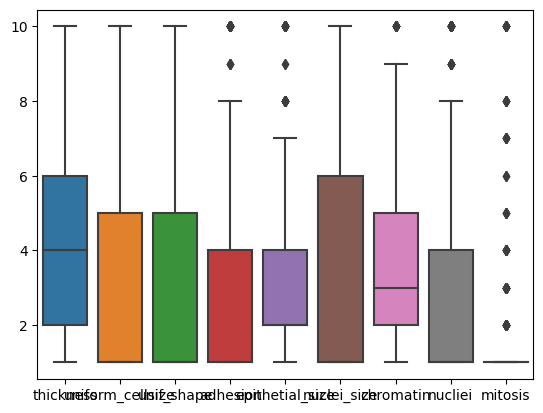

In [28]:
sns.boxplot(X)

In [29]:

def calculate_iqr_range(data, factor=1.5):
    iqr_range_values = {}

    for column in data.columns:
        column_data = data[column]
        q1 = np.percentile(column_data, 25)
        q3 = np.percentile(column_data, 75)
        iqr = q3 - q1

        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)

        iqr_range_values[column] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound}

    return iqr_range_values

In [30]:
calculate_iqr_range(X)

{'thickness': {'Lower Bound': -4.0, 'Upper Bound': 12.0},
 'uniform_cellsize': {'Lower Bound': -5.0, 'Upper Bound': 11.0},
 'unif_shape': {'Lower Bound': -5.0, 'Upper Bound': 11.0},
 'adhesion': {'Lower Bound': -3.5, 'Upper Bound': 8.5},
 'epithetial_size': {'Lower Bound': -1.0, 'Upper Bound': 7.0},
 'nuclei_size': {'Lower Bound': -6.5, 'Upper Bound': 13.5},
 'chromatin': {'Lower Bound': -2.5, 'Upper Bound': 9.5},
 'nucliei': {'Lower Bound': -3.5, 'Upper Bound': 8.5},
 'mitosis': {'Lower Bound': 1.0, 'Upper Bound': 1.0}}

In [31]:
detect_outliers(X['mitosis'])

[7.0,
 10.0,
 8.0,
 10.0,
 7.0,
 10.0,
 10.0,
 8.0,
 7.0,
 8.0,
 7.0,
 7.0,
 10.0,
 7.0,
 10.0,
 10.0,
 10.0,
 8.0,
 8.0,
 10.0,
 10.0,
 8.0,
 10.0,
 7.0,
 8.0,
 10.0,
 7.0,
 10.0,
 10.0,
 7.0,
 8.0]

In [32]:
#this is within the domain of the data as given in the UCI data file so it should not be removed
#Every data column is within the range of 1-10 except the class

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=80,test_size=0.3)

<Axes: >

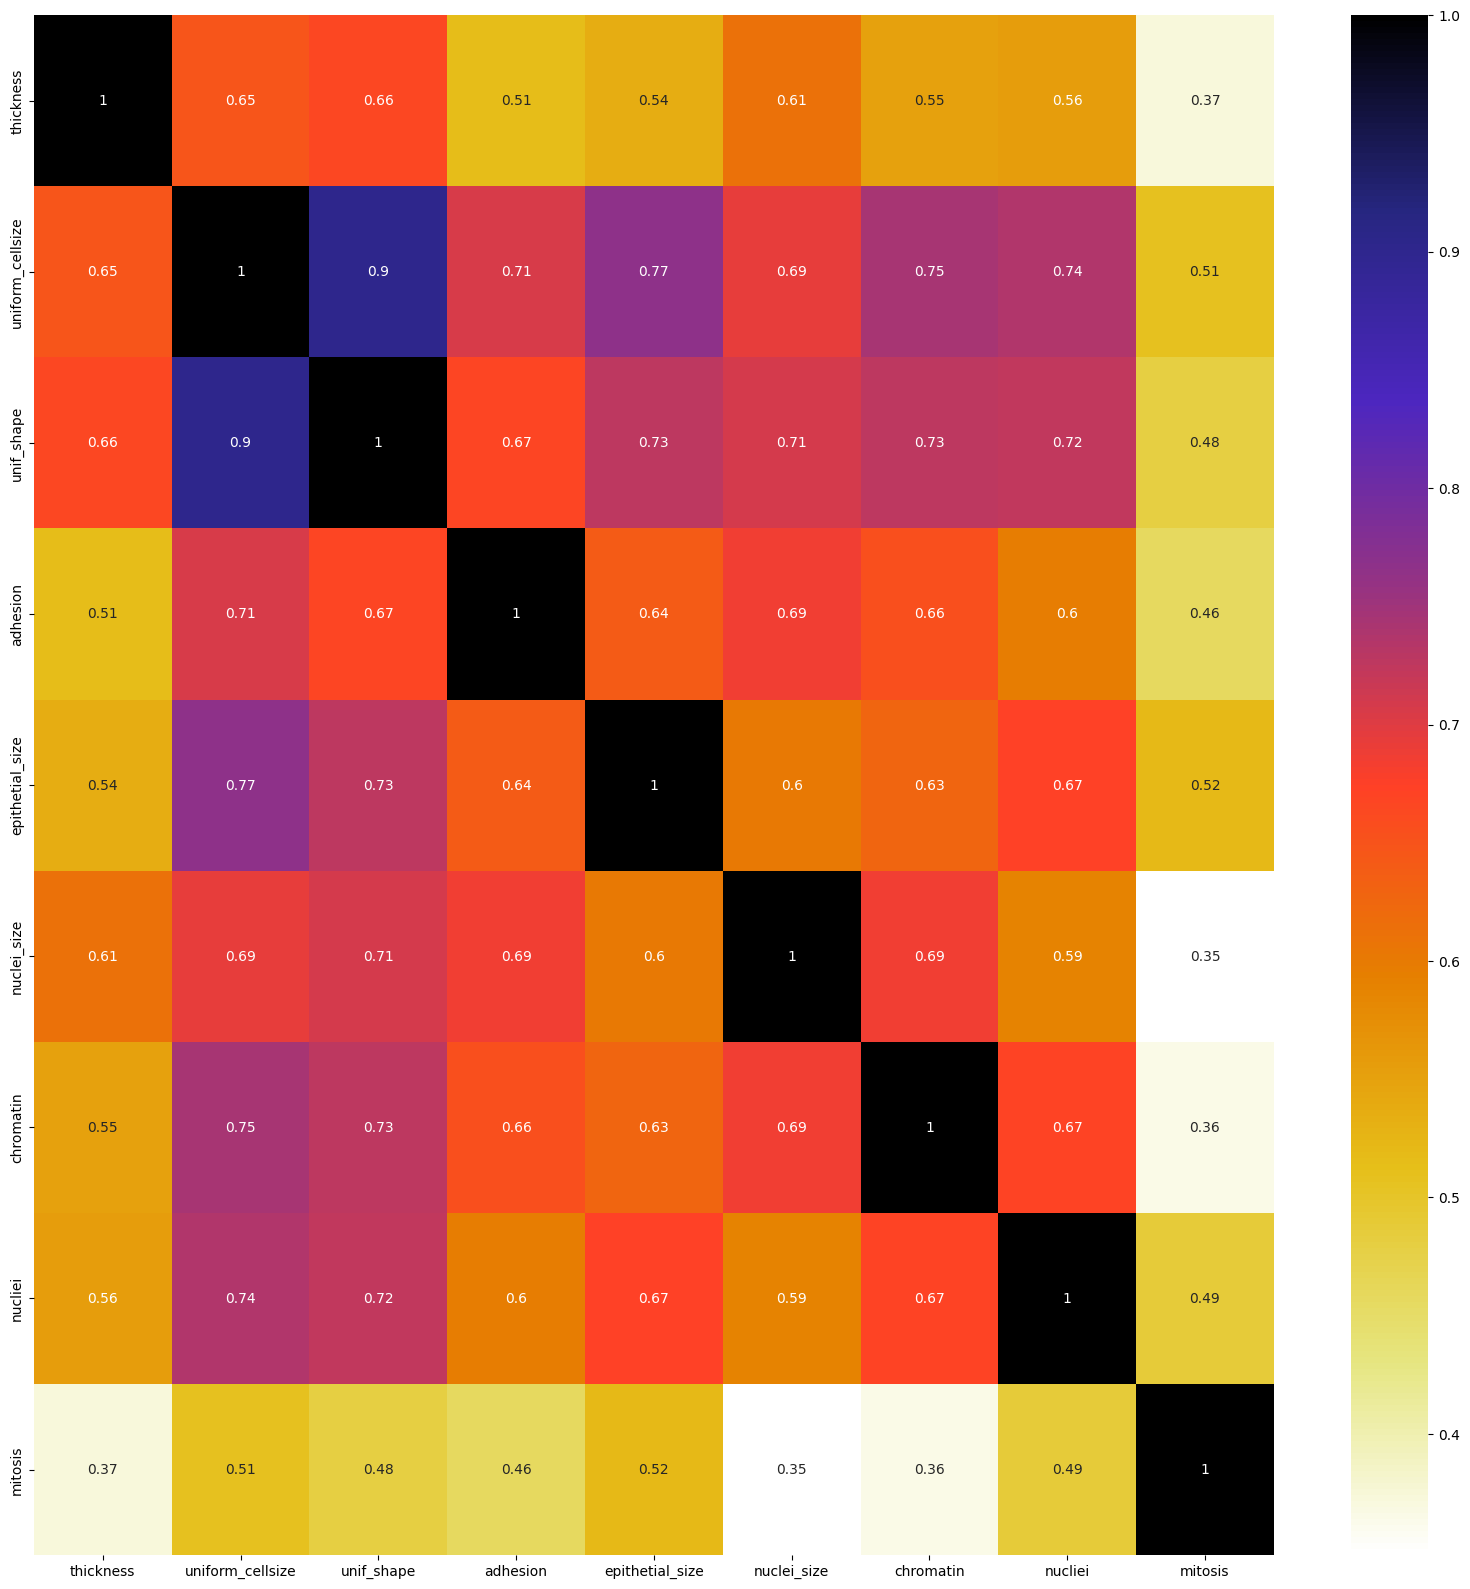

In [34]:
plt.figure(figsize=(20,20))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
#correlation of epithetial size and unif_shape is high with other features

In [35]:
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features=correlation(X_train,0.75)
len(set(corr_features))

2

In [36]:
 corr_features

{'epithetial_size', 'unif_shape'}

In [37]:
X_train.drop(columns=['epithetial_size', 'unif_shape'],inplace=True)
X_test.drop(columns=['epithetial_size', 'unif_shape'],inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score

In [40]:
log_reg=LogisticRegression()

In [41]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,
                                                  30,40,50]
                                           ,'max_iter':[100,200,300]}

In [42]:
class_reg=GridSearchCV(log_reg,param_grid=parameter,scoring='accuracy',cv=5)

In [43]:
class_reg.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [44]:
print(class_reg.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [45]:
print(class_reg.best_score_)

0.9610982537344835


In [46]:
y_pred=class_reg.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score,classification_report

In [48]:
score=accuracy_score(y_pred,y_test)
print(score)

0.9666666666666667


In [49]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       134
           1       0.94      0.97      0.95        76

    accuracy                           0.97       210
   macro avg       0.96      0.97      0.96       210
weighted avg       0.97      0.97      0.97       210



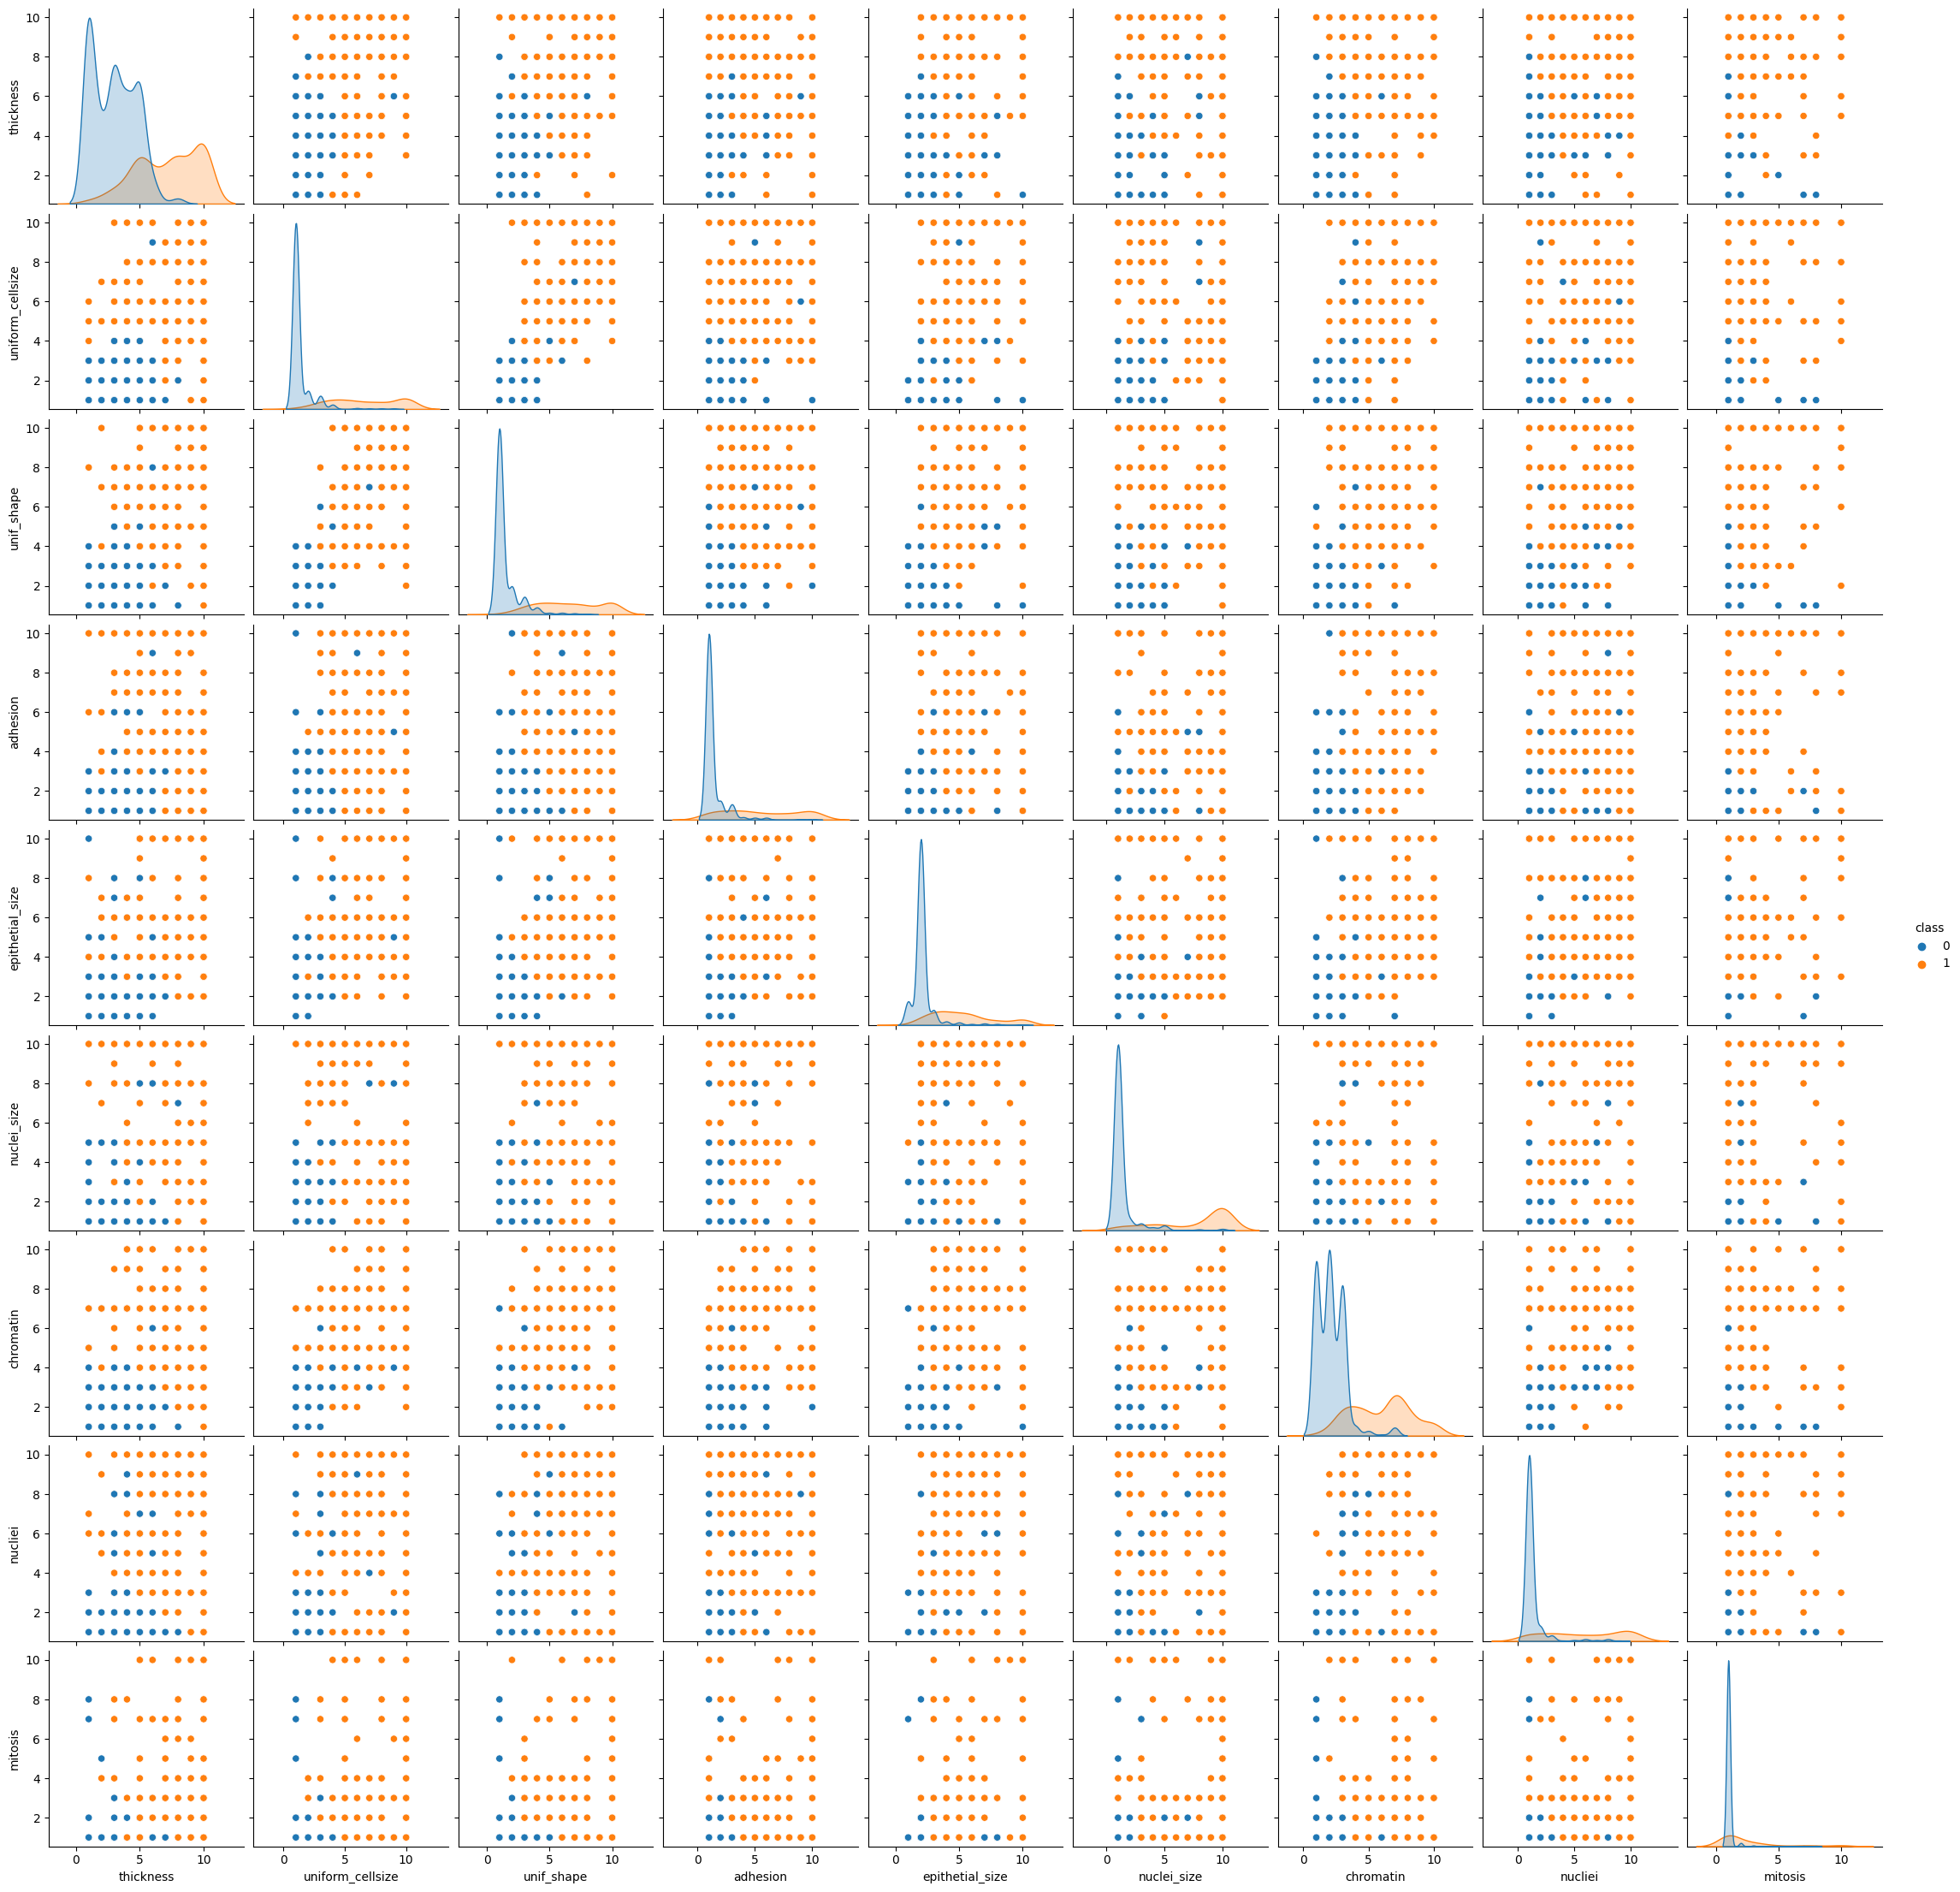

In [50]:
sns.pairplot(df,hue='class')

In [51]:
class_reg.score(X_train,y_train)

0.967280163599182

In [52]:
accuracy_score(y_test,y_pred)

0.9666666666666667

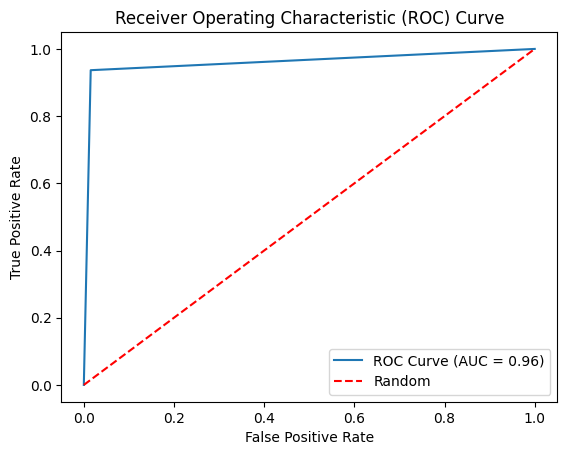

In [53]:
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Plot the 45-degree line indicating random chance
plt.plot([0, 1], [0, 1], 'r--', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[129,   2],
       [  5,  74]])